### First Analysis of the Data

#### Import necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


Let's have a first look a the data


In [2]:
features0 = pd.read_csv('safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
features1 = pd.read_csv('safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
features2 = pd.read_csv('safety/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [3]:
features = features0.append(features1).append(features2)

In [4]:
labels = pd.read_csv('safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

### Data Cleaning

After observing the data, I saw that some retrieved telematic data were wrong

Here some telemetic data had a period of more than 600000000 seconds which is impossible so I am removing them

In [7]:
#index_to_delete = features.loc[features['second'] == float(features[['second']].max(axis=0))].index.item()
index_to_delete = features.loc[features['second'] > 600000000.0].index

features.drop(index_to_delete, inplace=True)

In [9]:
#A delete
features.loc[features['second'] > 600000000.0].index

Int64Index([], dtype='int64')

Moreover some bookingID were labeled as a dangerous ride (1) and a normal ride (0) so I decided to delete these duplicates

In [153]:
duplicateRowsDF = labels[labels.duplicated(subset='bookingID')]['bookingID'].values
labels.drop_duplicates(subset='bookingID', keep=False, inplace=True)

index_to_delete = features.loc[features['bookingID'].isin(duplicateRowsDF)].index
features.drop(index_to_delete, inplace=True)

In [154]:
print(features.shape)
print(labels.shape)

(4823453, 11)
(19982, 2)


In [156]:
#labels.head(33)
labels.loc[labels['bookingID']==670014898360]

,bookingID,label
14992,670014898360,1


In [279]:
features.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [50]:
print(labels.loc[labels['bookingID'] == 274877907034])
print(labels.loc[labels['bookingID'] == 1073741824054])

          bookingID  label
14735  274877907034      1
           bookingID  label
11323  1073741824054      0


In [51]:
bad_driving = features.loc[features['bookingID'] == 1202590843006]
bad_driving2 = features.loc[features['bookingID'] == 274877907034]

In [40]:
good_driving = features.loc[features['bookingID'] == 1073741824054]

In [6]:
features.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06,4.840667e+06
mean,8.186057e+11,1.159601e+01,1.689599e+02,6.954586e-02,4.466822e+00,8.968795e-01,-1.768868e-03,3.230907e-04,-2.075129e-04,3.800221e+03,9.006316e+00
std,4.953782e+11,8.708604e+01,1.072956e+02,1.422619e+00,8.131093e+00,3.250967e+00,1.458477e-01,3.415189e-01,1.464847e-01,1.407434e+06,8.104971e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-3.898399e+01,-5.780019e+01,-7.844842e+01,-4.845575e+01,-5.734489e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.082733e-01,-2.060907e+00,-9.289786e-01,-2.683441e-02,-2.992409e-02,-1.872096e-02,2.420000e+02,1.020000e+00
50%,8.074539e+11,4.253000e+00,1.686765e+02,6.176083e-02,9.081485e+00,7.781393e-01,-6.610155e-04,2.593994e-04,-2.556635e-05,5.200000e+02,7.530000e+00
75%,1.254130e+12,8.000000e+00,2.630000e+02,6.356223e-01,9.710432e+00,2.753332e+00,2.328494e-02,3.145974e-02,1.825959e-02,8.630000e+02,1.548000e+01
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.281000e+01,7.805576e+01,3.870809e+01,8.031496e+01,3.383183e+01,6.193165e+08,5.055000e+01


In [38]:
features.loc[features['second'] == float(features[['second']].max(axis=0))].index.item()

91569

In [26]:
float(features[['second']].max(axis=0))

619316528.0

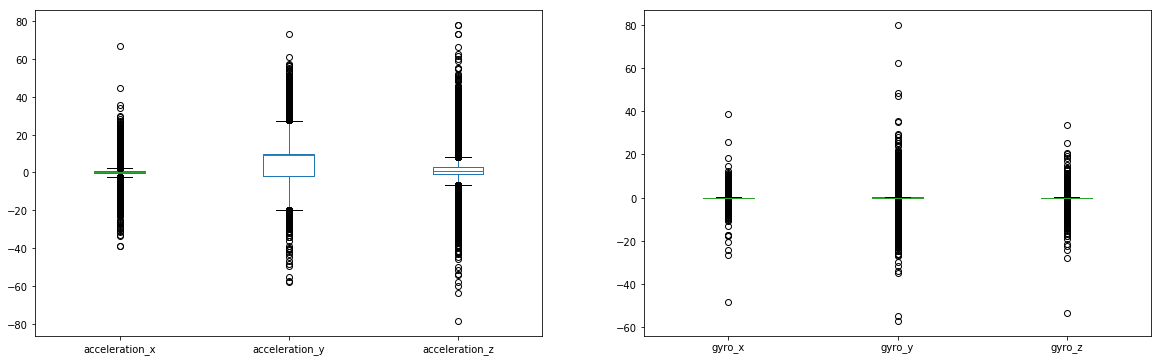

In [10]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
box0 = features[['acceleration_x','acceleration_y','acceleration_z']]
box1 = features[['gyro_x','gyro_y','gyro_z']]

# Subplot 1: Box plot
box0.plot(kind='box', figsize=(20, 6), ax=ax0) # add to subplot 1


# Subplot 2: Line plot
box1.plot(kind='box', figsize=(20, 6), ax=ax1) # add to subplot 2

plt.show()

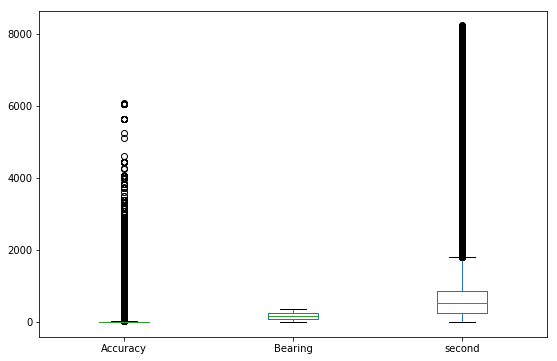

In [66]:
fig = plt.figure() # create figure

ax2 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
box2 = features[['Accuracy','Bearing','second']]

# Subplot 1: Box plot
box2.plot(kind='box', figsize=(20, 6), ax=ax2) # add to subplot 1

plt.show()

In [77]:
def count_outliers(col, m = 2.):
    #Extract data from the column
    data_col = features[['bookingID',col]].set_index('bookingID')
    #Substract of the median
    data_col = data_col - features[[col]].median(axis=0)
    data_col = data_col.abs()
    #Calcul of the new median
    data_col_median = data_col.median(axis=0)
    #We only keep data that are more than twice the median
    data_col = data_col/data_col_median
    data_col = data_col[data_col>2]
    data_col.dropna(inplace=True)
    #We count for each booking the number of outliers
    data_col = data_col.groupby(data_col.index).count()
    data_col.rename(columns={col:col+'_outliers'}, inplace=True)
    return data_col

In [161]:
features_outliers = labels[['bookingID']].set_index('bookingID')
for col in features.columns:
    if(col not in ('bookingID', 'Bearing')):
        temp = count_outliers(col)
        features_outliers = features_outliers.join(temp)
        
features_outliers.head()

,Accuracy_outliers,acceleration_x_outliers,acceleration_y_outliers,acceleration_z_outliers,gyro_x_outliers,gyro_y_outliers,gyro_z_outliers,second_outliers,Speed_outliers
bookingID,,,,,,,,,
111669149733,6.0,11.0,3.0,NaN,6.0,35.0,36.0,NaN,NaN
335007449205,15.0,69.0,7.0,12.0,72.0,120.0,47.0,NaN,NaN
171798691856,111.0,7.0,6.0,NaN,31.0,19.0,63.0,NaN,39.0
1520418422900,4.0,45.0,8.0,1.0,10.0,53.0,16.0,NaN,51.0
798863917116,NaN,45.0,12.0,2.0,68.0,61.0,24.0,NaN,2.0


In [160]:
print(features_outliers.loc[0])

Accuracy_outliers          272.0
acceleration_x_outliers     92.0
acceleration_y_outliers    308.0
acceleration_z_outliers     33.0
gyro_x_outliers            108.0
gyro_y_outliers            117.0
gyro_z_outliers            126.0
second_outliers            149.0
Speed_outliers               6.0
Name: 0, dtype: float64


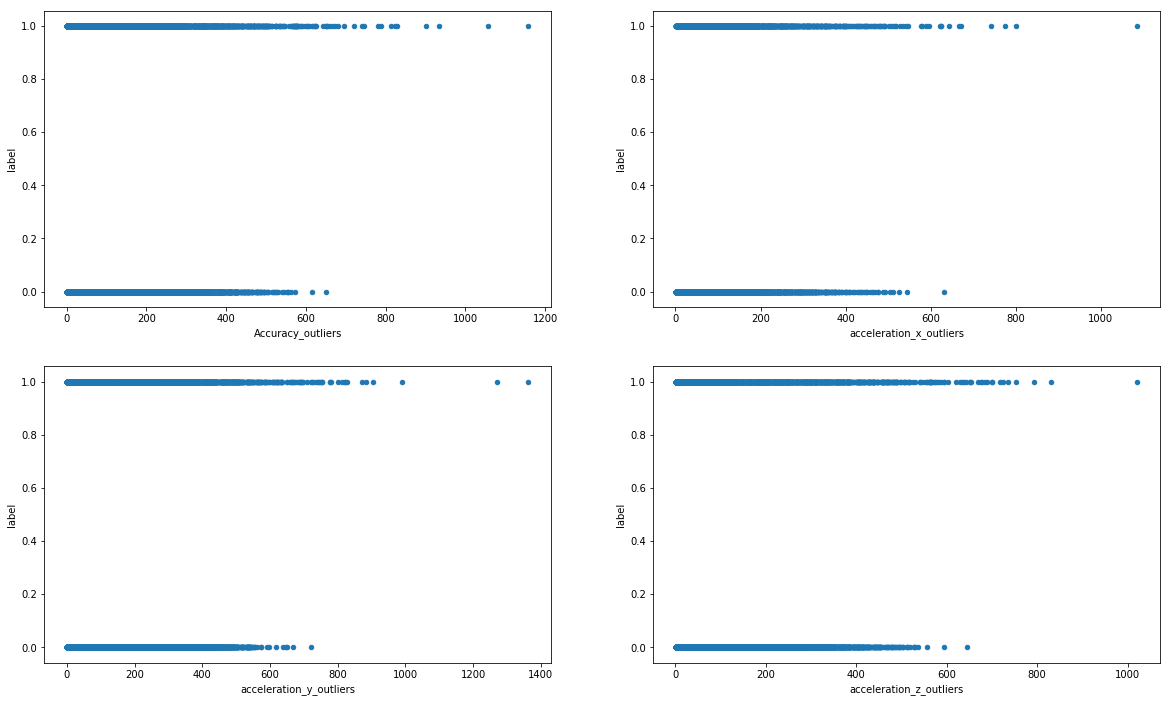

In [177]:
#test = labels.merge(accel_y_outliers2, how='left', left_on='bookingID', right_on=accel_y_outliers2.index)
#test.sort_values(by='acceleration_y', ascending=True, inplace=True)
fig = plt.figure() # create figure

nb_plot = 1
for col in features_outliers.columns:
    if(nb_plot<5):
        ax = fig.add_subplot(2, 2, nb_plot)
        box = labels.merge(features_outliers[[col]], how='left', left_on='bookingID', right_on=features_outliers.index)
        box.plot(kind='scatter', x=col, y='label', figsize=(20, 12), ax=ax)
        nb_plot+=1

plt.show()

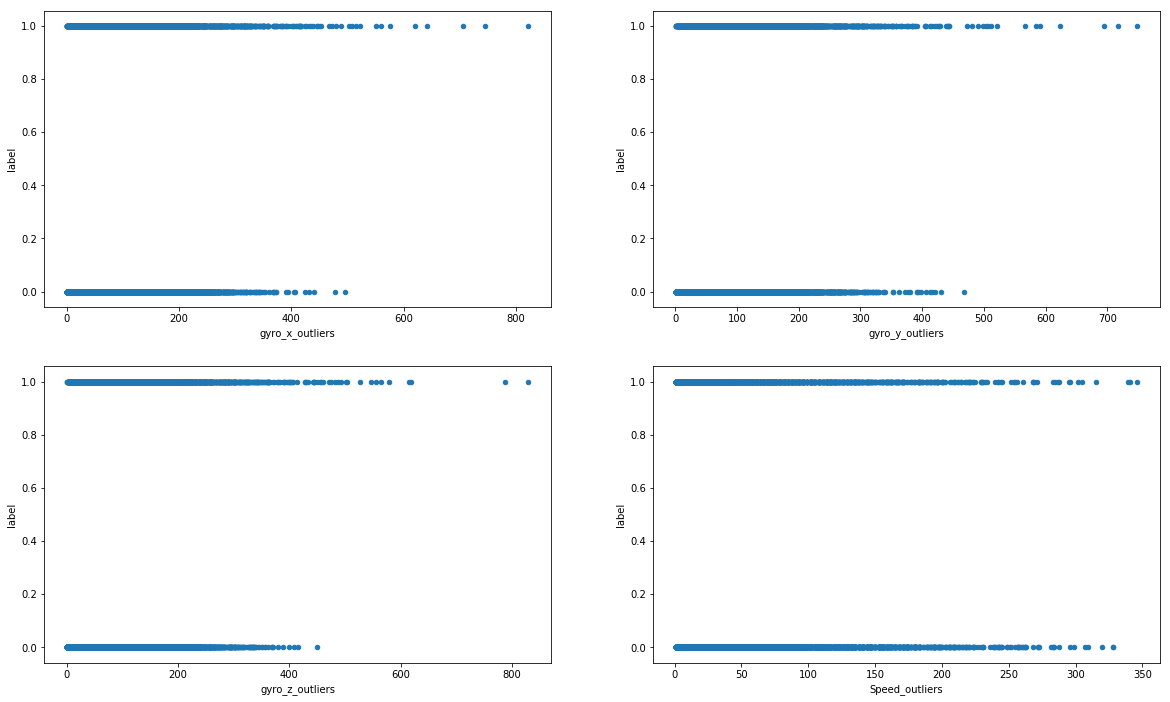

In [176]:
fig = plt.figure() # create figure
nb_plot = 1
for col in features_outliers.columns:
    if(col not in ('Accuracy_outliers','acceleration_x_outliers','acceleration_y_outliers','acceleration_z_outliers','second_outliers')):
        ax = fig.add_subplot(2, 2, nb_plot)
        box = labels.merge(features_outliers[[col]], how='left', left_on='bookingID', right_on=features_outliers.index)
        box.plot(kind='scatter', x=col, y='label', figsize=(20, 12), ax=ax)
        nb_plot+=1
        
plt.show()

In [201]:
features_mean = features.groupby(['bookingID']).mean()
features_final = features_outliers.join(features_mean)
features_final = features_final[['Accuracy', 'Accuracy_outliers', 'acceleration_x', 'acceleration_x_outliers','acceleration_y','acceleration_y_outliers','acceleration_z','acceleration_z_outliers','gyro_x','gyro_x_outliers','gyro_y','gyro_y_outliers','gyro_z','gyro_z_outliers','second','second_outliers','Speed','Speed_outliers']]
features_final.head()

,Accuracy,Accuracy_outliers,acceleration_x,acceleration_x_outliers,acceleration_y,acceleration_y_outliers,acceleration_z,acceleration_z_outliers,gyro_x,gyro_x_outliers,gyro_y,gyro_y_outliers,gyro_z,gyro_z_outliers,second,second_outliers,Speed,Speed_outliers
bookingID,,,,,,,,,,,,,,,,,,
111669149733,4.028109,6.0,0.146751,11.0,9.735508,3.0,-0.007632,NaN,-0.003327,6.0,0.004628,35.0,-0.000267,36.0,373.008734,NaN,5.454125,NaN
335007449205,4.095619,15.0,0.230310,69.0,9.552901,7.0,0.898553,12.0,-0.000972,72.0,-0.001189,120.0,-0.002349,47.0,530.531447,NaN,6.019844,NaN
171798691856,30.950984,111.0,0.289293,7.0,9.612039,6.0,-0.065454,NaN,-0.009070,31.0,0.006076,19.0,-0.035588,63.0,714.806452,NaN,16.328629,39.0
1520418422900,3.801455,4.0,-0.458118,45.0,9.836574,8.0,0.739191,1.0,-0.004290,10.0,-0.017010,53.0,-0.015176,16.0,454.158845,NaN,13.638520,51.0
798863917116,3.854399,NaN,0.168118,45.0,9.606852,12.0,1.175170,2.0,0.006580,68.0,0.010229,61.0,-0.002883,24.0,267.274510,NaN,8.448777,2.0


### Data Preprocessing

Now that we have our final tab, let's do some data preprocessing in order for the Neural Network to be more efficient

In [202]:
features_final = features_final.fillna(0)
features_final.head(10)

,Accuracy,Accuracy_outliers,acceleration_x,acceleration_x_outliers,acceleration_y,acceleration_y_outliers,acceleration_z,acceleration_z_outliers,gyro_x,gyro_x_outliers,gyro_y,gyro_y_outliers,gyro_z,gyro_z_outliers,second,second_outliers,Speed,Speed_outliers
bookingID,,,,,,,,,,,,,,,,,,
111669149733,4.028109,6.0,0.146751,11.0,9.735508,3.0,-0.007632,0.0,-0.003327,6.0,0.004628,35.0,-0.000267,36.0,373.008734,0.0,5.454125,0.0
335007449205,4.095619,15.0,0.230310,69.0,9.552901,7.0,0.898553,12.0,-0.000972,72.0,-0.001189,120.0,-0.002349,47.0,530.531447,0.0,6.019844,0.0
171798691856,30.950984,111.0,0.289293,7.0,9.612039,6.0,-0.065454,0.0,-0.009070,31.0,0.006076,19.0,-0.035588,63.0,714.806452,0.0,16.328629,39.0
1520418422900,3.801455,4.0,-0.458118,45.0,9.836574,8.0,0.739191,1.0,-0.004290,10.0,-0.017010,53.0,-0.015176,16.0,454.158845,0.0,13.638520,51.0
798863917116,3.854399,0.0,0.168118,45.0,9.606852,12.0,1.175170,2.0,0.006580,68.0,0.010229,61.0,-0.002883,24.0,267.274510,0.0,8.448777,2.0
283467841567,3.662514,0.0,0.319179,38.0,9.649318,4.0,1.015970,3.0,0.000425,63.0,-0.003971,50.0,-0.002390,55.0,442.898551,0.0,3.511666,0.0
231928234141,4.915028,18.0,-0.293881,23.0,8.859289,3.0,4.137955,77.0,-0.001782,21.0,-0.007555,66.0,0.000532,51.0,356.110092,0.0,15.151208,43.0
188978561143,4.526153,0.0,1.181049,99.0,9.515099,3.0,-0.174616,0.0,-0.007605,97.0,-0.058159,90.0,0.006732,91.0,681.477833,17.0,5.182921,0.0
1194000908346,4.935268,21.0,-5.474016,194.0,7.982537,21.0,0.729575,1.0,-0.000808,33.0,0.001945,66.0,0.001801,53.0,664.953608,0.0,9.585202,0.0


### Data Normalization

In [205]:
features_final_norm = features_final.copy()
for col in features_final_norm.columns:
    #test[col] = (features_final[col] - features_final[col].min())/(features_final[col].max() - features_final[col].min())
    #test[col] = (test[col] - test[col].mean())/(test[col].std())
    features_final_norm[col] = features_final_norm[col]/features_final_norm[col].max()
#med_grouped_sum_norm = (values - values.mean()) / (values.max() - values.min())
    
features_final_norm.head(10)

,Accuracy,Accuracy_outliers,acceleration_x,acceleration_x_outliers,acceleration_y,acceleration_y_outliers,acceleration_z,acceleration_z_outliers,gyro_x,gyro_x_outliers,gyro_y,gyro_y_outliers,gyro_z,gyro_z_outliers,second,second_outliers,Speed,Speed_outliers
bookingID,,,,,,,,,,,,,,,,,,
111669149733,0.002435,0.005181,0.014669,0.010138,0.247623,0.002201,-0.000196,0.000000,-0.007596,0.007299,0.000559,0.046791,-0.000191,0.043426,0.051160,0.000000,0.184499,0.000000
335007449205,0.002476,0.012953,0.023021,0.063594,0.242979,0.005136,0.023055,0.011753,-0.002218,0.087591,-0.000143,0.160428,-0.001675,0.056695,0.072765,0.000000,0.203636,0.000000
171798691856,0.018711,0.095855,0.028917,0.006452,0.244483,0.004402,-0.001679,0.000000,-0.020707,0.037713,0.000733,0.025401,-0.025371,0.075995,0.098039,0.000000,0.552355,0.112717
1520418422900,0.002298,0.003454,-0.045792,0.041475,0.250194,0.005869,0.018966,0.000979,-0.009795,0.012165,-0.002053,0.070856,-0.010819,0.019300,0.062290,0.000000,0.461356,0.147399
798863917116,0.002330,0.000000,0.016805,0.041475,0.244351,0.008804,0.030152,0.001959,0.015022,0.082725,0.001235,0.081551,-0.002055,0.028951,0.036658,0.000000,0.285800,0.005780
283467841567,0.002214,0.000000,0.031904,0.035023,0.245431,0.002935,0.026067,0.002938,0.000970,0.076642,-0.000479,0.066845,-0.001704,0.066345,0.060746,0.000000,0.118791,0.000000
231928234141,0.002971,0.015544,-0.029375,0.021198,0.225337,0.002201,0.106170,0.075416,-0.004069,0.025547,-0.000912,0.088235,0.000380,0.061520,0.048842,0.000000,0.512526,0.124277
188978561143,0.002736,0.000000,0.118054,0.091244,0.242017,0.002201,-0.004480,0.000000,-0.017363,0.118005,-0.007020,0.120321,0.004800,0.109771,0.093468,0.008868,0.175325,0.000000
1194000908346,0.002984,0.018135,-0.547165,0.178802,0.203036,0.015407,0.018719,0.000979,-0.001845,0.040146,0.000235,0.088235,0.001284,0.063932,0.091202,0.000000,0.324243,0.000000


In [223]:
labels = labels.set_index('bookingID')
labels.head()

,label
bookingID,
111669149733,0
335007449205,1
171798691856,0
1520418422900,0
798863917116,0


Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [253]:
from sklearn.model_selection import train_test_split

X = np.asarray(features_final_norm)
y = np.asarray(labels['label'])

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(features_final_norm, labels, test_size=0.20, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3997
number of training samples: 15985


In [254]:
#print(x_train.head(20))
#print(y_train.loc[1649267441739])
#print(type(y_train.values))
print(type(labels['label']))
y_train[0:5]


<class 'pandas.core.series.Series'>


,label
bookingID,
481036337182,0
790273982569,1
1511828488305,0
34359738377,0
773094113286,0


Lets build our model using __LogisticRegression__ from Scikit-learn package. 
Now lets fit our model with train set:

In [274]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Now we can predict using our test set:

In [278]:
from sklearn.metrics import classification_report, jaccard_similarity_score, log_loss

yhat = LR.predict(x_test)
print (classification_report(y_test, yhat))

print(jaccard_similarity_score(y_test, yhat))
yhat_prob = LR.predict_proba(x_test)
print(log_loss(y_test, yhat_prob))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3006
           1       1.00      0.01      0.02       991

   micro avg       0.76      0.76      0.76      3997
   macro avg       0.88      0.51      0.44      3997
weighted avg       0.82      0.76      0.65      3997

0.7550662997247936
0.5401085774608785


In [269]:
print(y_test[0:1000])
print(yhat[0:1000])


               label
bookingID           
489626271794       1
824633720833       0
206158430302       0
1511828488284      0
850403524618       0
326417514642       1
1529008357406      0
850403524639       1
188978561199       0
34359738393        0
489626271858       0
1709396983839      1
1340029796451      0
60129542150        1
360777253018       1
919123001460       1
1537598292121      0
1589137899562      0
326417514519       0
910533066843       0
317827579910       0
515396075631       0
1005022347302      0
197568495645       0
1030792151053      0
1348619731108      0
163208757288       0
1494648619024      1
1108101562526      0
1443109011475      1
1202590843036      1
618475290686       0
541165879445       0
1503238553640      0
1073741824095      0
1065151889455      0
592705486956       1
901943132280       0
1211180777572      1
412316860586       0
755914244138       0
1468878815403      0
1675037245551      0
1331439861938      0
109                1
77309411435  

In [126]:
#to delete
median_accel_y = features[['acceleration_y']].median(axis=0)
accel_y = features[['bookingID','acceleration_y']].set_index('bookingID')
accel_y_outliers = accel_y - median_accel_y
accel_y_outliers = accel_y_outliers.abs()
median_y_outliers = accel_y_outliers.median(axis=0)
accel_y_outliers2 = accel_y_outliers/median_y_outliers
accel_y_outliers2 = accel_y_outliers2[accel_y_outliers2>2]
accel_y_outliers2 = accel_y_outliers2.sort_index()
print(labels.loc[labels['bookingID'] == 13].head())
accel_y_outliers2.dropna(inplace=True)
accel_y_outliers2 = accel_y_outliers2.groupby(accel_y_outliers2.index).count()
print(median_y_outliers)
accel_y_outliers2.head(15)

       bookingID  label
12463         13      0
12602         13      1
acceleration_y    0.861635
dtype: float64


,acceleration_y
bookingID,
0,309
1,4
2,2
4,318
6,12
7,28
8,3
10,9
11,6
